## CartPole Skating

> **Problem**: Hvis Peter vil unnslippe ulven, må han kunne bevege seg raskere enn den. Vi skal se hvordan Peter kan lære å skate, spesielt å holde balansen, ved hjelp av Q-Learning.

Først, la oss installere gym og importere nødvendige biblioteker:


In [1]:
#code block 1

## Opprett et cartpole-miljø


In [ ]:
#code block 2

For å se hvordan miljøet fungerer, la oss kjøre en kort simulering i 100 trinn.


In [ ]:
#code block 3

Under simulering må vi få observasjoner for å bestemme hvordan vi skal handle. Faktisk returnerer `step`-funksjonen oss de nåværende observasjonene, belønningsfunksjonen og `done`-flagget som indikerer om det gir mening å fortsette simuleringen eller ikke:


In [ ]:
#code block 4

Vi kan få minimums- og maksimumsverdien av disse tallene:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

La oss også utforske en annen diskretiseringsmetode ved bruk av binner:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


La oss nå kjøre en kort simulering og observere disse diskrete miljøverdiene.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


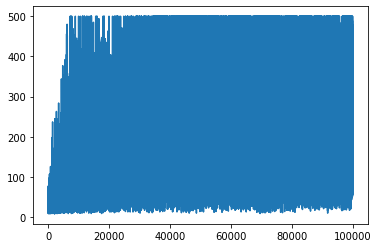

In [20]:
plt.plot(rewards)

Fra denne grafen er det ikke mulig å si noe, fordi på grunn av naturen til den stokastiske treningsprosessen varierer lengden på treningsøktene sterkt. For å gi mer mening til denne grafen, kan vi beregne **glidende gjennomsnitt** over en serie eksperimenter, la oss si 100. Dette kan enkelt gjøres ved hjelp av `np.convolve`:


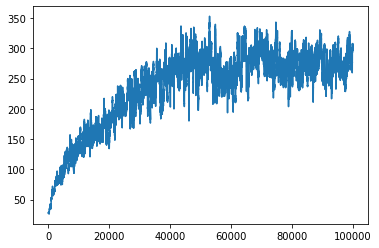

In [22]:
#code block 12

## Variere hyperparametere og se resultatet i praksis

Nå ville det vært interessant å faktisk se hvordan den trente modellen oppfører seg. La oss kjøre simuleringen, og vi vil følge den samme strategien for valg av handling som under trening: sampling i henhold til sannsynlighetsfordelingen i Q-Tabellen:


In [23]:
# code block 13

## Lagre resultatet som en animert GIF

Hvis du vil imponere vennene dine, kan du sende dem den animerte GIF-bildet av balansestangen. For å gjøre dette kan vi bruke `env.render` for å lage et bilde, og deretter lagre disse som en animert GIF ved hjelp av PIL-biblioteket:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi tilstreber nøyaktighet, vennligst vær oppmerksom på at automatiserte oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør betraktes som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
